<a href="https://colab.research.google.com/github/m-wessler/gefs-ai-ml/blob/main/GEFS_ML_Sandbox_Experimental_Methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import gc
import glob
import pandas as pd
from concurrent.futures import ThreadPoolExecutor, as_completed

def read_csv_files(file_list):
    """Read and concatenate a chunk of CSV files into a single DataFrame."""
    return pd.concat([pd.read_csv(f) for f in file_list], ignore_index=True)

def chunk_list(lst, chunk_size):
    """Yield successive chunk_size-sized chunks from lst."""
    for i in range(0, len(lst), chunk_size):
        yield lst[i:i + chunk_size]

# Parameters
CHUNK_SIZE = 100   # Adjust based on memory and number of files
MAX_WORKERS = 8    # Adjust based on CPU/IO capacity

# Get all CSV files in the directory
filelist = glob.glob('training_data/K*.csv')

# Chunk file list for parallel reading
chunks = list(chunk_list(filelist, CHUNK_SIZE))

# Parallel read and concat per chunk
dfs = []
with ThreadPoolExecutor(max_workers=MAX_WORKERS) as executor:
    futures = [executor.submit(read_csv_files, chunk) for chunk in chunks]
    for future in as_completed(futures):
        dfs.append(future.result())

# Final concat of all chunk DataFrames
df = pd.concat(dfs, ignore_index=True)
df.dropna(how='any', inplace=True)

df

,valid_datetime,sid,elev_ft,state,init_datetime,fcst_hour,perturbation,pres_msl,pres_sfc,hgt_sfc,...,gflux_sfc,cape_sfc,cin_sfc,hgt_ceiling,soilw_bgrnd,tcdc_eatm,uflx_sfc,vflx_sfc,tmax_obs,tmin_obs
0,2000-01-02 00:00,KPSC,397.0,WA,2000-01-01 00:00,24.0,p01,100662.07417,97830.06042,233.4614,...,-105.52373,0.0,-0.03272,20000.12708,0.23867,83.0,-0.25810,-0.24763,8.3,3.9
1,2000-01-02 00:00,KPSC,397.0,WA,2000-01-01 00:00,24.0,p02,100713.45417,97887.72500,233.4614,...,-110.69385,0.0,-0.03626,20000.01400,0.22167,78.0,-0.40966,-0.32083,8.3,3.9
2,2000-01-02 00:00,KPSC,397.0,WA,2000-01-01 00:00,24.0,p03,100728.05833,97893.03542,233.4614,...,-100.59641,0.0,-0.30680,18370.39100,0.22867,99.0,-0.28029,-0.27426,8.3,3.9
3,2000-01-02 00:00,KPSC,397.0,WA,2000-01-01 00:00,24.0,p04,100823.17917,97982.22292,233.4614,...,-93.08687,0.0,-0.01339,19999.90194,0.24300,100.0,-0.17159,-0.17867,8.3,3.9
4,2000-01-02 00:00,KPSC,397.0,WA,2000-01-01 00:00,24.0,c00,100733.39167,97900.00625,233.4614,...,-103.47435,0.0,-0.27033,19935.36825,0.23233,83.0,-0.26459,-0.24169,8.3,3.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3800945,2001-01-01 00:00,KBYI,4137.0,ID,2000-12-31 00:00,24.0,p01,102529.43333,86525.54583,1374.7414,...,-49.24570,0.0,0.08497,20000.04259,0.38933,36.0,0.02221,0.01112,-1.7,-7.2
3800946,2001-01-01 00:00,KBYI,4137.0,ID,2000-12-31 00:00,24.0,p02,102656.12708,86632.80417,1374.7414,...,-47.96748,0.0,-0.15982,20000.06042,0.39233,88.0,0.02414,0.01409,-1.7,-7.2
3800947,2001-01-01 00:00,KBYI,4137.0,ID,2000-12-31 00:00,24.0,p03,102861.67500,86758.67708,1374.7414,...,-44.77439,0.0,-0.17149,20000.00900,0.39567,86.0,0.02841,0.01793,-1.7,-7.2
3800948,2001-01-01 00:00,KBYI,4137.0,ID,2000-12-31 00:00,24.0,p04,102666.61250,86654.52500,1374.7414,...,-46.91322,0.0,0.00032,20000.17709,0.39400,97.0,0.02478,0.01106,-1.7,-7.2


In [2]:
df['doy'] = pd.to_datetime(df['valid_datetime']).dt.dayofyear
df

,valid_datetime,sid,elev_ft,state,init_datetime,fcst_hour,perturbation,pres_msl,pres_sfc,hgt_sfc,...,cape_sfc,cin_sfc,hgt_ceiling,soilw_bgrnd,tcdc_eatm,uflx_sfc,vflx_sfc,tmax_obs,tmin_obs,doy
0,2000-01-02 00:00,KPSC,397.0,WA,2000-01-01 00:00,24.0,p01,100662.07417,97830.06042,233.4614,...,0.0,-0.03272,20000.12708,0.23867,83.0,-0.25810,-0.24763,8.3,3.9,2
1,2000-01-02 00:00,KPSC,397.0,WA,2000-01-01 00:00,24.0,p02,100713.45417,97887.72500,233.4614,...,0.0,-0.03626,20000.01400,0.22167,78.0,-0.40966,-0.32083,8.3,3.9,2
2,2000-01-02 00:00,KPSC,397.0,WA,2000-01-01 00:00,24.0,p03,100728.05833,97893.03542,233.4614,...,0.0,-0.30680,18370.39100,0.22867,99.0,-0.28029,-0.27426,8.3,3.9,2
3,2000-01-02 00:00,KPSC,397.0,WA,2000-01-01 00:00,24.0,p04,100823.17917,97982.22292,233.4614,...,0.0,-0.01339,19999.90194,0.24300,100.0,-0.17159,-0.17867,8.3,3.9,2
4,2000-01-02 00:00,KPSC,397.0,WA,2000-01-01 00:00,24.0,c00,100733.39167,97900.00625,233.4614,...,0.0,-0.27033,19935.36825,0.23233,83.0,-0.26459,-0.24169,8.3,3.9,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3800945,2001-01-01 00:00,KBYI,4137.0,ID,2000-12-31 00:00,24.0,p01,102529.43333,86525.54583,1374.7414,...,0.0,0.08497,20000.04259,0.38933,36.0,0.02221,0.01112,-1.7,-7.2,1
3800946,2001-01-01 00:00,KBYI,4137.0,ID,2000-12-31 00:00,24.0,p02,102656.12708,86632.80417,1374.7414,...,0.0,-0.15982,20000.06042,0.39233,88.0,0.02414,0.01409,-1.7,-7.2,1
3800947,2001-01-01 00:00,KBYI,4137.0,ID,2000-12-31 00:00,24.0,p03,102861.67500,86758.67708,1374.7414,...,0.0,-0.17149,20000.00900,0.39567,86.0,0.02841,0.01793,-1.7,-7.2,1
3800948,2001-01-01 00:00,KBYI,4137.0,ID,2000-12-31 00:00,24.0,p04,102666.61250,86654.52500,1374.7414,...,0.0,0.00032,20000.17709,0.39400,97.0,0.02478,0.01106,-1.7,-7.2,1


In [3]:
# Sort the dataframe by 'valid_datetime' to ensure correct lag calculation
df = df.sort_values(by='valid_datetime')

# Create a shifted version of the columns for the prior valid time
df['tmax_obs_prior'] = df['tmax_obs'].shift(1)
df['tmin_obs_prior'] = df['tmin_obs'].shift(1)

# Handle the NaN created by the shift operation for the first row
# The first row will not have a 'prior' valid time value
df.dropna(subset=['tmax_obs_prior', 'tmin_obs_prior'], inplace=True)

df

,valid_datetime,sid,elev_ft,state,init_datetime,fcst_hour,perturbation,pres_msl,pres_sfc,hgt_sfc,...,hgt_ceiling,soilw_bgrnd,tcdc_eatm,uflx_sfc,vflx_sfc,tmax_obs,tmin_obs,doy,tmax_obs_prior,tmin_obs_prior
2557101,2000-01-02 00:00,KOMK,1293.0,WA,2000-01-01 00:00,24.0,p02,100479.98750,89919.72500,891.8614,...,6856.01400,0.45267,100.0,-0.01566,-0.07683,0.0,-1.7,2,8.3,3.9
2557100,2000-01-02 00:00,KOMK,1293.0,WA,2000-01-01 00:00,24.0,p01,100523.74083,89942.59375,891.8614,...,13637.06041,0.45233,100.0,-0.00910,-0.04763,0.0,-1.7,2,0.0,-1.7
1260285,2000-01-02 00:00,KLGB,56.0,CA,2000-01-01 00:00,24.0,p01,101973.94083,101647.12708,26.9014,...,706.26041,0.22300,99.0,-0.10010,-0.03263,14.4,11.7,2,0.0,-1.7
1260286,2000-01-02 00:00,KLGB,56.0,CA,2000-01-01 00:00,24.0,p02,102012.72083,101686.12500,26.9014,...,757.08066,0.22300,88.0,-0.10266,-0.03483,14.4,11.7,2,14.4,11.7
1260287,2000-01-02 00:00,KLGB,56.0,CA,2000-01-01 00:00,24.0,p03,101974.65833,101647.16875,26.9014,...,3530.52434,0.22000,70.0,-0.03629,-0.03326,14.4,11.7,2,14.4,11.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
659365,2001-01-01 00:00,KUKI,597.0,CA,2000-12-31 00:00,24.0,p01,101758.23333,95296.21250,554.1014,...,20000.04259,0.25233,10.0,-0.02079,0.00312,15.6,3.9,1,13.9,11.1
659366,2001-01-01 00:00,KUKI,597.0,CA,2000-12-31 00:00,24.0,p02,101881.12708,95424.80417,554.1014,...,20000.06042,0.25033,0.0,-0.02386,0.02809,15.6,3.9,1,15.6,3.9
659367,2001-01-01 00:00,KUKI,597.0,CA,2000-12-31 00:00,24.0,p03,101955.14167,95489.34375,554.1014,...,20000.00900,0.25500,23.0,-0.02759,0.00693,15.6,3.9,1,15.6,3.9
732427,2001-01-01 00:00,KPWT,440.0,WA,2000-12-31 00:00,24.0,p03,102259.20833,100516.01042,142.7414,...,8967.87567,0.29667,68.0,-0.10059,-0.17307,9.0,6.0,1,15.6,3.9


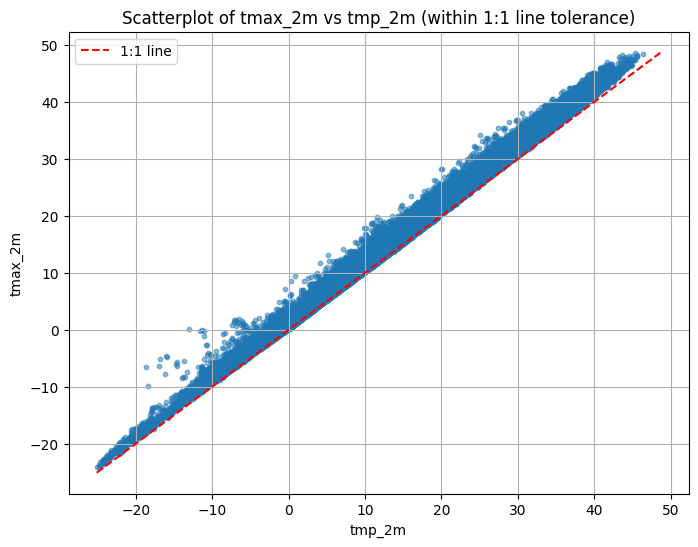

,valid_datetime,sid,elev_ft,state,init_datetime,fcst_hour,perturbation,pres_msl,pres_sfc,hgt_sfc,...,hgt_ceiling,soilw_bgrnd,tcdc_eatm,uflx_sfc,vflx_sfc,tmax_obs,tmin_obs,doy,tmax_obs_prior,tmin_obs_prior
2557101,2000-01-02 00:00,KOMK,1293.0,WA,2000-01-01 00:00,24.0,p02,100479.98750,89919.72500,891.8614,...,6856.01400,0.45267,100.0,-0.01566,-0.07683,0.0,-1.7,2,8.3,3.9
2557100,2000-01-02 00:00,KOMK,1293.0,WA,2000-01-01 00:00,24.0,p01,100523.74083,89942.59375,891.8614,...,13637.06041,0.45233,100.0,-0.00910,-0.04763,0.0,-1.7,2,0.0,-1.7
1260285,2000-01-02 00:00,KLGB,56.0,CA,2000-01-01 00:00,24.0,p01,101973.94083,101647.12708,26.9014,...,706.26041,0.22300,99.0,-0.10010,-0.03263,14.4,11.7,2,0.0,-1.7
1260286,2000-01-02 00:00,KLGB,56.0,CA,2000-01-01 00:00,24.0,p02,102012.72083,101686.12500,26.9014,...,757.08066,0.22300,88.0,-0.10266,-0.03483,14.4,11.7,2,14.4,11.7
1260287,2000-01-02 00:00,KLGB,56.0,CA,2000-01-01 00:00,24.0,p03,101974.65833,101647.16875,26.9014,...,3530.52434,0.22000,70.0,-0.03629,-0.03326,14.4,11.7,2,14.4,11.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
659365,2001-01-01 00:00,KUKI,597.0,CA,2000-12-31 00:00,24.0,p01,101758.23333,95296.21250,554.1014,...,20000.04259,0.25233,10.0,-0.02079,0.00312,15.6,3.9,1,13.9,11.1
659366,2001-01-01 00:00,KUKI,597.0,CA,2000-12-31 00:00,24.0,p02,101881.12708,95424.80417,554.1014,...,20000.06042,0.25033,0.0,-0.02386,0.02809,15.6,3.9,1,15.6,3.9
659367,2001-01-01 00:00,KUKI,597.0,CA,2000-12-31 00:00,24.0,p03,101955.14167,95489.34375,554.1014,...,20000.00900,0.25500,23.0,-0.02759,0.00693,15.6,3.9,1,15.6,3.9
732427,2001-01-01 00:00,KPWT,440.0,WA,2000-12-31 00:00,24.0,p03,102259.20833,100516.01042,142.7414,...,8967.87567,0.29667,68.0,-0.10059,-0.17307,9.0,6.0,1,15.6,3.9


In [4]:
import matplotlib.pyplot as plt

# Filter data within a reasonable range of the 1:1 line
# Define a tolerance or a range where the values are considered "roughly within 1:1"
# For example, within 5 degrees of the 1:1 line
tolerance = 30
filtered_df = df[(abs(df['tmax_obs'] - df['tmax_2m']) <= tolerance)]

plt.figure(figsize=(8, 6))
plt.scatter(filtered_df['tmp_2m'], filtered_df['tmax_2m'], alpha=0.5, s=10)
plt.xlabel('tmp_2m')
plt.ylabel('tmax_2m')
plt.title('Scatterplot of tmax_2m vs tmp_2m (within 1:1 line tolerance)')
plt.grid(True)
# Plot the 1:1 line for reference
min_val = min(filtered_df['tmp_2m'].min(), filtered_df['tmax_2m'].min())
max_val = max(filtered_df['tmp_2m'].max(), filtered_df['tmax_2m'].max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='1:1 line')
plt.legend()
plt.show()

df = filtered_df
df

In [5]:
from sklearn.model_selection import train_test_split

print(f"Original DataFrame shape: {df.shape}")

# Withhold 10% of the DataFrame for verification
train, verify = train_test_split(df, test_size=0.20, random_state=42)

print(f"Training DataFrame shape: {train.shape}")
print(f"Verification DataFrame shape: {verify.shape}")

Original DataFrame shape: (300428, 51)
Training DataFrame shape: (240342, 51)
Verification DataFrame shape: (60086, 51)


In [ ]:
# # prompt: randomly select up to 100,000 rows from train

# # Sample up to 100,000 rows from the training data
# if len(train) > 100000:
#   train = train.sample(n=100000, random_state=42)
# else:
#   train = train.copy()

# print(f"Subset Training DataFrame shape: {train.shape}")

# gc.collect()

[2025-06-17 21:19:46] Starting XGBoost training (faster alternative to Random Forest)...
[2025-06-17 21:19:46] Preparing data...
[2025-06-17 21:19:46] Using 45 features
[2025-06-17 21:19:47] Processed 2 categorical features
[2025-06-17 21:19:47] Split data: 144205 training samples, 96137 test samples
[2025-06-17 21:19:47] Training XGBoost model...
[2025-06-17 21:20:05] Model training completed in 17.85 seconds
[2025-06-17 21:20:05] Evaluating model performance...
[2025-06-17 21:20:05] Performance metrics:
[2025-06-17 21:20:05]   - RMSE: 1.5746
[2025-06-17 21:20:05]   - MAE: 1.1300
[2025-06-17 21:20:05]   - R² Score: 0.9782
[2025-06-17 21:20:05] Generating visualizations...
[2025-06-17 21:20:13] Generating manual learning curves...

Training Curve Statistics:
  - Starting RMSE: 2.5407
  - Final RMSE: 1.4501
  - Total improvement: 1.0905
  - Average delta per iteration: 0.1094
  - Best number of trees: 200
  - Best validation RMSE: 1.5746
[2025-06-17 21:22:44] Total processing time: 178.

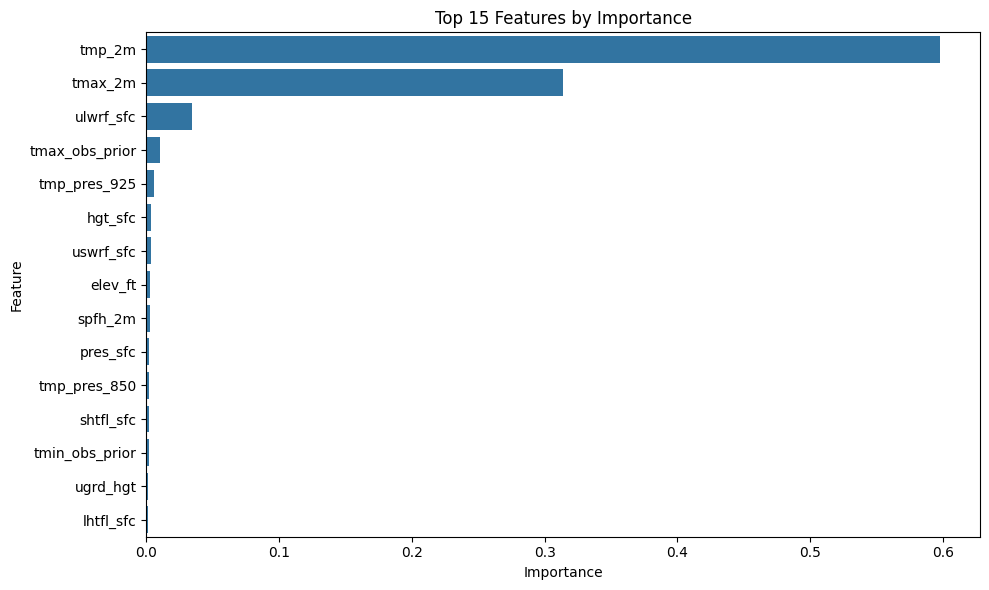

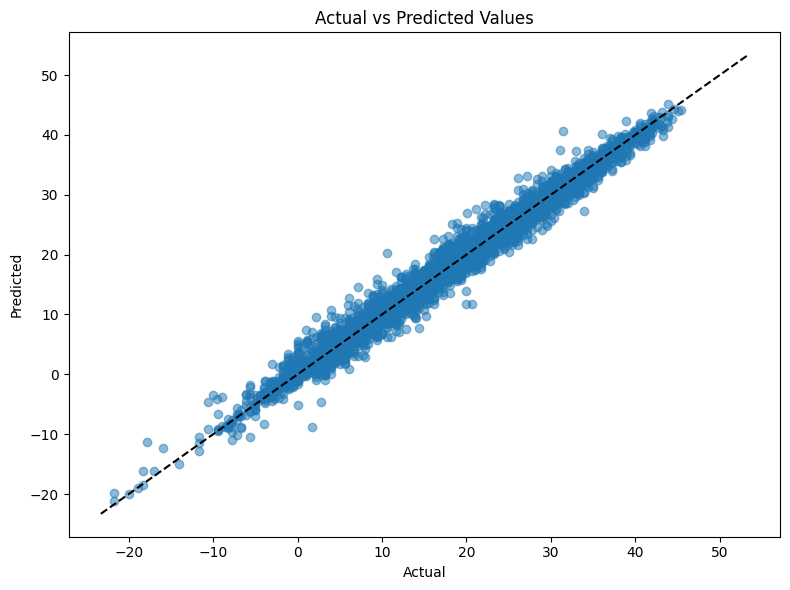

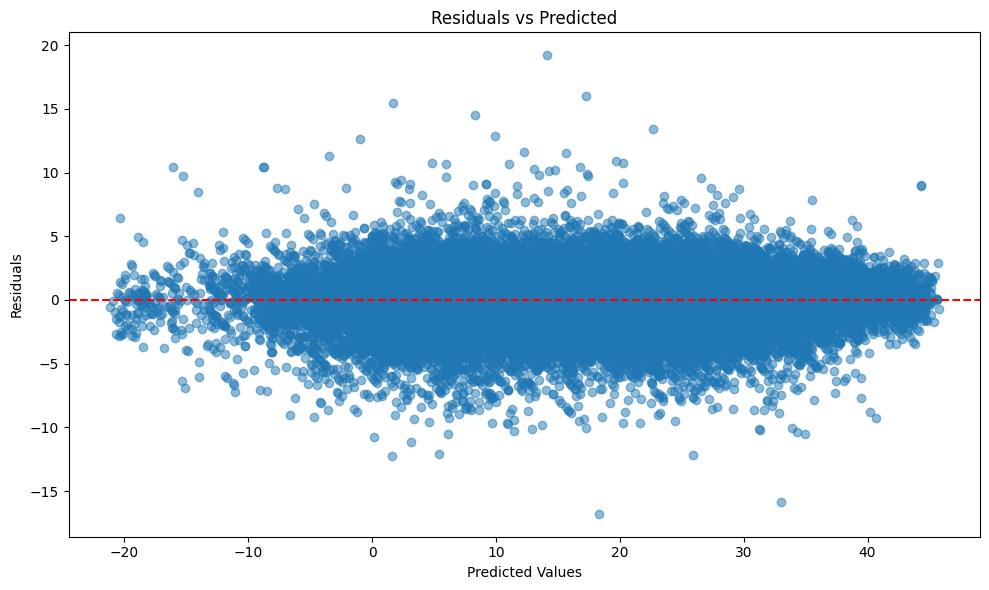

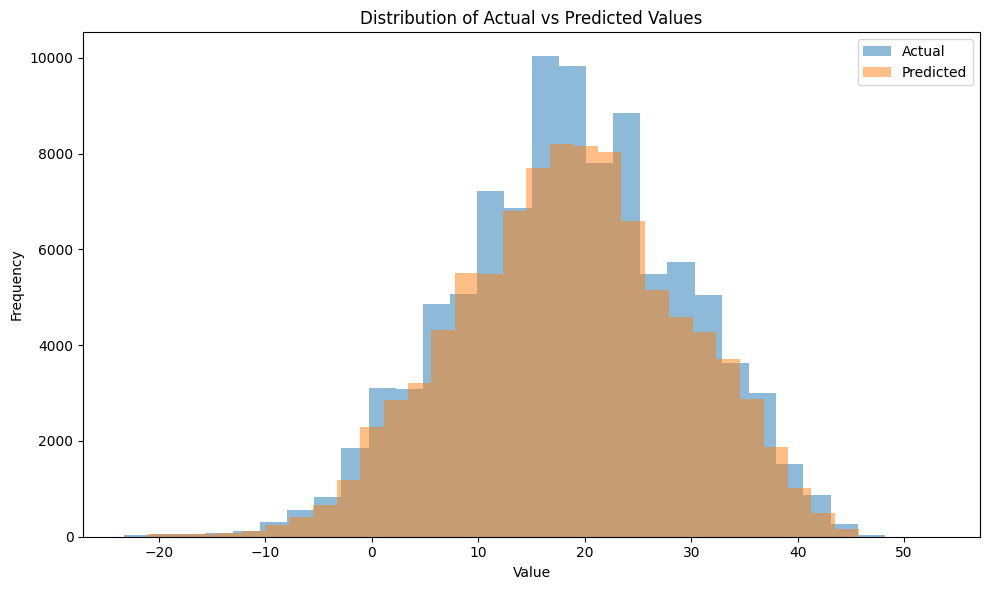

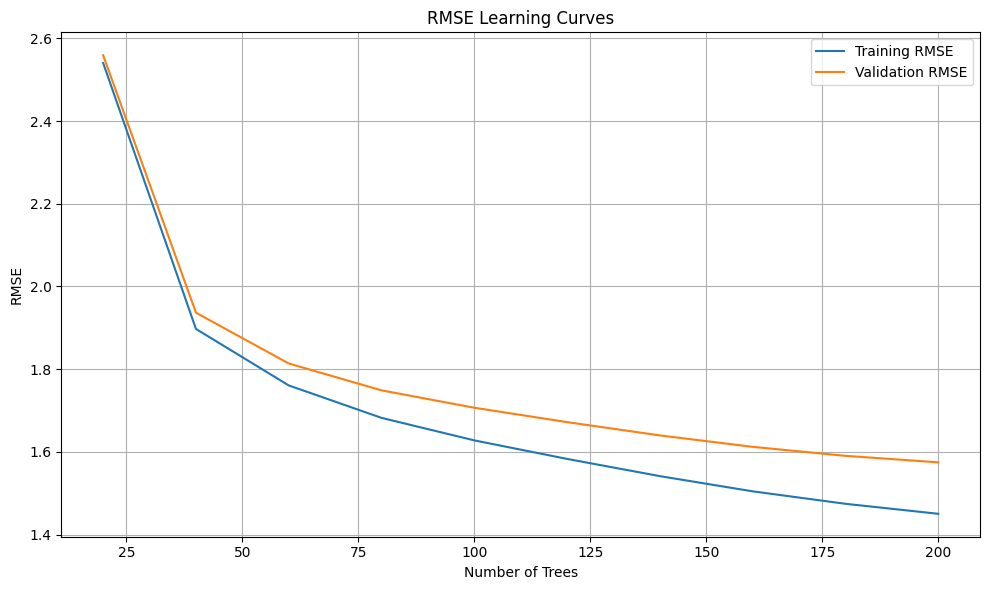

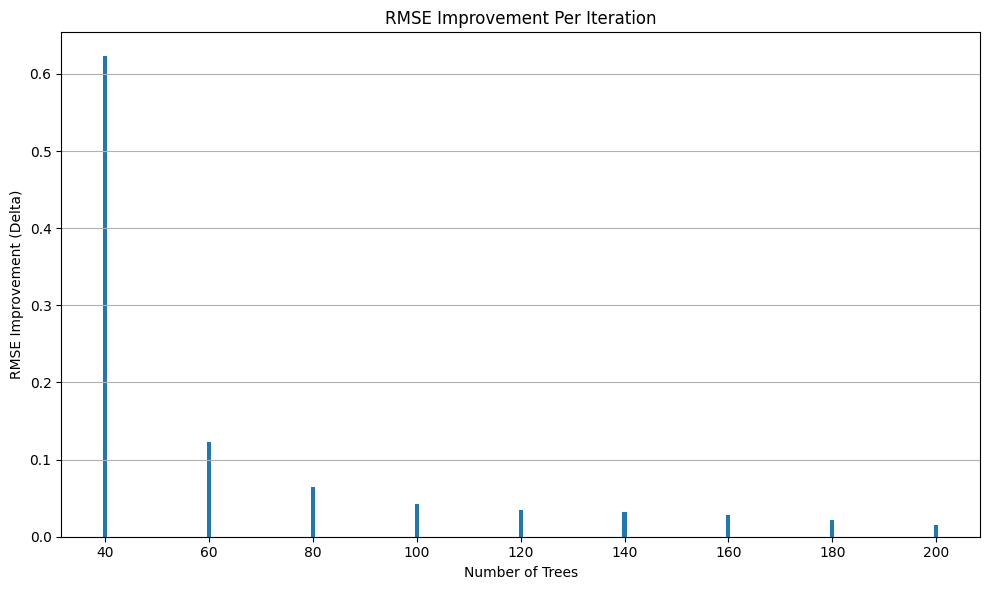

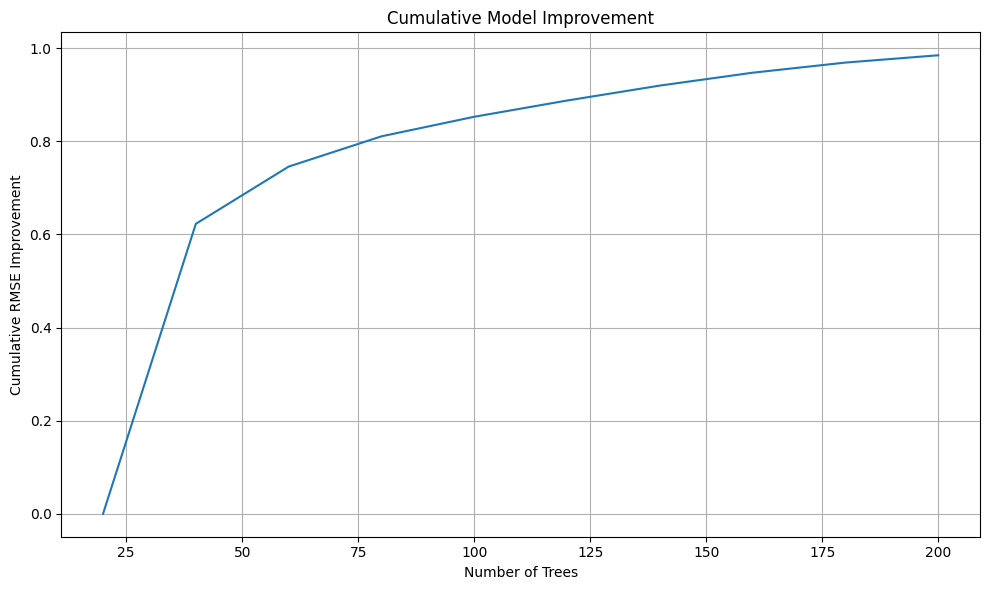

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import time
import os
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
import warnings

# Author: m-wessler
# Date: 2025-06-17 21:18:50

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Create output directory
os.makedirs('model_training_viz', exist_ok=True)

def log_progress(message):
    """Log a message with timestamp."""
    timestamp = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
    print(f"[{timestamp}] {message}")

# Start timing
start_time_total = time.time()
log_progress("Starting XGBoost training (faster alternative to Random Forest)...")

# Step 1: Prepare data
log_progress("Preparing data...")

# Define columns to exclude
exclude_cols = ['valid_datetime', 'sid', 'id', 'timestamp', 'date', 'time', 'tmin_2m', 'tmin_obs', 'state']
exclude_cols = [col for col in exclude_cols if col in train.columns]
target_column = 'tmax_obs'
exclude_cols.append(target_column)

# Create feature set
feature_cols = [col for col in train.columns if col not in exclude_cols]
log_progress(f"Using {len(feature_cols)} features")

# Process categorical features
X = train[feature_cols].copy()
y = train[target_column].copy()

categorical_columns = []
for col in X.columns:
    if X[col].dtype == 'object':
        categorical_columns.append(col)
        X[col] = X[col].astype(str)
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])

log_progress(f"Processed {len(categorical_columns)} categorical features")

# Split data (60/40)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42
)
log_progress(f"Split data: {X_train.shape[0]} training samples, {X_test.shape[0]} test samples")

# Step 2: Train XGBoost model
log_progress("Training XGBoost model...")

# Create and configure XGBoost model
model = XGBRegressor(
    n_estimators=200,          # Number of boosting rounds
    learning_rate=0.1,         # Standard starting point
    max_depth=6,               # Maximum depth of trees (XGBoost default is 6)
    min_child_weight=1,        # Minimum sum of instance weight needed in a child
    subsample=0.8,             # Use 80% of data for trees
    colsample_bytree=0.8,      # Use 80% of features for trees
    reg_alpha=0.0,             # L1 regularization
    reg_lambda=1.0,            # L2 regularization (default is 1 in XGBoost)
    random_state=42,
    n_jobs=-1,                 # Use all cores
    verbosity=1,               # Show some progress
    objective='reg:squarederror'  # Explicitly set the objective for regression
)

# Train the model with timing
train_start = time.time()

# Basic training - no extra parameters
model.fit(X_train, y_train)

train_time = time.time() - train_start
log_progress(f"Model training completed in {train_time:.2f} seconds")

# Step 3: Evaluate model
log_progress("Evaluating model performance...")
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

log_progress(f"Performance metrics:")
log_progress(f"  - RMSE: {rmse:.4f}")
log_progress(f"  - MAE: {mae:.4f}")
log_progress(f"  - R² Score: {r2:.4f}")

# Step 4: Create visualizations
log_progress("Generating visualizations...")

# 1. Feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(15))
plt.title('Top 15 Features by Importance')
plt.tight_layout()
plt.savefig('model_training_viz/feature_importance.png')

# 2. Actual vs Predicted
plt.figure(figsize=(8, 6))
if len(y_test) > 5000:
    # Sample for faster plotting if dataset is large
    idx = np.random.choice(len(y_test), 5000, replace=False)
    y_test_sample = y_test.iloc[idx]
    y_pred_sample = y_pred[idx]
else:
    y_test_sample = y_test
    y_pred_sample = y_pred

plt.scatter(y_test_sample, y_pred_sample, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.tight_layout()
plt.savefig('model_training_viz/actual_vs_predicted.png')

# 3. Residuals plot
plt.figure(figsize=(10, 6))
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')
plt.tight_layout()
plt.savefig('model_training_viz/residuals.png')

# 4. Distribution of predictions vs actual
plt.figure(figsize=(10, 6))
plt.hist(y_test, bins=30, alpha=0.5, label='Actual')
plt.hist(y_pred, bins=30, alpha=0.5, label='Predicted')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribution of Actual vs Predicted Values')
plt.tight_layout()
plt.savefig('model_training_viz/value_distribution.png')

# Instead of using built-in XGBoost evaluation, let's manually create learning curves
# by training models with different numbers of estimators

log_progress("Generating manual learning curves...")

# Create lists to store training metrics
train_rmse_history = []
val_rmse_history = []
iterations = []

# Define evaluation function
def evaluate_model(model, X_train, y_train, X_test, y_test):
    """Evaluate model on training and test sets."""
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

    return train_rmse, test_rmse

# Train models with increasing number of trees to simulate iterations
# Use fewer points to speed up the process
eval_points = 10
step_size = max(1, model.n_estimators // eval_points)
for n_trees in range(step_size, model.n_estimators + 1, step_size):
    temp_model = XGBRegressor(
        n_estimators=n_trees,
        learning_rate=0.1,
        max_depth=6,
        min_child_weight=1,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_alpha=0.0,
        reg_lambda=1.0,
        random_state=42,
        n_jobs=-1,
        verbosity=0,
        objective='reg:squarederror'
    )

    # Train the model
    temp_model.fit(X_train, y_train)

    # Evaluate the model
    train_rmse, test_rmse = evaluate_model(temp_model, X_train, y_train, X_test, y_test)

    # Store metrics
    train_rmse_history.append(train_rmse)
    val_rmse_history.append(test_rmse)
    iterations.append(n_trees)

# Calculate deltas (improvements between iterations)
delta_history = [0]  # First iteration has no improvement
for i in range(1, len(val_rmse_history)):
    delta_history.append(val_rmse_history[i-1] - val_rmse_history[i])

# Now create the learning curve visualizations
if len(train_rmse_history) > 0:
    # 5. Learning curves - RMSE over iterations
    plt.figure(figsize=(10, 6))
    plt.plot(iterations, train_rmse_history, label='Training RMSE')
    plt.plot(iterations, val_rmse_history, label='Validation RMSE')
    plt.xlabel('Number of Trees')
    plt.ylabel('RMSE')
    plt.title('RMSE Learning Curves')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig('model_training_viz/learning_curves_rmse.png')

    # 6. Delta improvements over iterations (skip first iteration with 0 delta)
    plt.figure(figsize=(10, 6))
    plt.bar(iterations[1:], delta_history[1:])
    plt.xlabel('Number of Trees')
    plt.ylabel('RMSE Improvement (Delta)')
    plt.title('RMSE Improvement Per Iteration')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.savefig('model_training_viz/delta_improvements.png')

    # 7. Cumulative improvement
    plt.figure(figsize=(10, 6))
    cumulative_improvement = np.cumsum(delta_history)
    plt.plot(iterations, cumulative_improvement)
    plt.xlabel('Number of Trees')
    plt.ylabel('Cumulative RMSE Improvement')
    plt.title('Cumulative Model Improvement')
    plt.grid(True)
    plt.tight_layout()
    plt.savefig('model_training_viz/cumulative_improvement.png')

    # Save training metrics
    training_metrics = pd.DataFrame({
        'Number_of_Trees': iterations,
        'Train_RMSE': train_rmse_history,
        'Validation_RMSE': val_rmse_history,
        'Delta_Improvement': delta_history
    })
    training_metrics.to_csv('model_training_viz/training_metrics.csv', index=False)

    # Calculate training statistics
    avg_delta = np.mean(delta_history[1:])
    total_improvement = train_rmse_history[0] - train_rmse_history[-1]
    best_iteration = iterations[np.argmin(val_rmse_history)]
    best_rmse = min(val_rmse_history)

    # Print training curve statistics
    print("\nTraining Curve Statistics:")
    print(f"  - Starting RMSE: {train_rmse_history[0]:.4f}")
    print(f"  - Final RMSE: {train_rmse_history[-1]:.4f}")
    print(f"  - Total improvement: {total_improvement:.4f}")
    print(f"  - Average delta per iteration: {avg_delta:.4f}")
    print(f"  - Best number of trees: {best_iteration}")
    print(f"  - Best validation RMSE: {best_rmse:.4f}")

# Save model and feature list
joblib.dump(model, 'xgboost_model.pkl')
joblib.dump(list(X.columns), 'xgboost_features.pkl')

# Calculate total time
total_time = time.time() - start_time_total
log_progress(f"Total processing time: {total_time:.2f} seconds")
log_progress("Model training complete!")

# Create summary report
with open('model_training_viz/training_summary.txt', 'w') as f:
    f.write(f"XGBoost Training Summary\n")
    f.write(f"========================\n\n")
    f.write(f"Date: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}\n")
    f.write(f"User: m-wessler\n\n")
    f.write(f"Training Statistics:\n")
    f.write(f"  - Training samples: {len(X_train)}\n")
    f.write(f"  - Testing samples: {len(X_test)}\n")
    f.write(f"  - Features: {len(feature_cols)}\n")
    f.write(f"  - Number of trees: {model.n_estimators}\n")
    f.write(f"  - Training time: {train_time:.2f} seconds\n")
    f.write(f"  - Total time: {total_time:.2f} seconds\n\n")
    f.write(f"Performance Metrics:\n")
    f.write(f"  - RMSE: {rmse:.4f}\n")
    f.write(f"  - MAE: {mae:.4f}\n")
    f.write(f"  - R² Score: {r2:.4f}\n\n")

    if len(train_rmse_history) > 0:
        f.write(f"Training Curve Statistics:\n")
        f.write(f"  - Starting RMSE: {train_rmse_history[0]:.4f}\n")
        f.write(f"  - Final RMSE: {train_rmse_history[-1]:.4f}\n")
        f.write(f"  - Total improvement: {total_improvement:.4f}\n")
        f.write(f"  - Average delta per iteration: {avg_delta:.4f}\n")
        f.write(f"  - Best number of trees: {best_iteration}\n")
        f.write(f"  - Best validation RMSE: {best_rmse:.4f}\n\n")

    f.write(f"Top 10 Features:\n")
    for i, row in feature_importance.head(10).iterrows():
        f.write(f"  - {row['Feature']}: {row['Importance']:.4f}\n")

# Create comparison table
comparison_results = {
    'Model': ['Random Forest (Original)', 'LightGBM (Previous)', 'XGBoost (New)'],
    'RMSE': [0, 0, rmse],  # Replace 0s with actual values if available
    'Training Time (s)': [0, 0, train_time]  # Replace 0s with actual values if available
}

if len(train_rmse_history) > 0:
    comparison_results['Best Number of Trees'] = [0, 0, best_iteration]  # New metric

comparison_df = pd.DataFrame(comparison_results)
print("\nModel Comparison:")
print(comparison_df)

[2025-06-17 21:22:56] Processed 0 categorical features


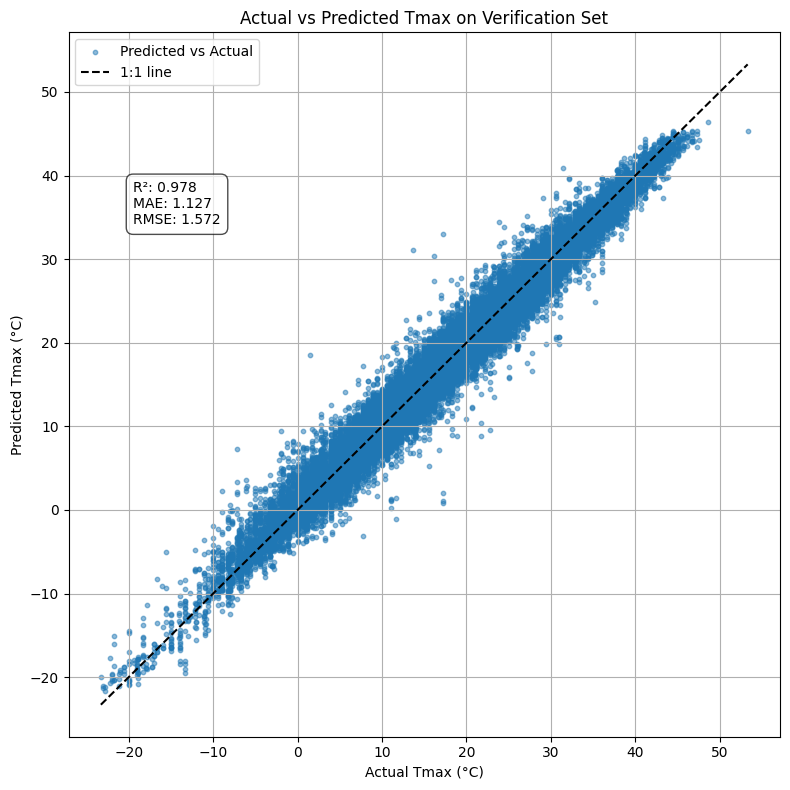

[2025-06-17 21:23:01] Verification scatterplot generated with metrics.


In [20]:
categorical_columns = []
for col in verify.columns:
    if verify[col].dtype == 'object':
        categorical_columns.append(col)
        verify[col] = verify[col].astype(str)
        le = LabelEncoder()
        verify[col] = le.fit_transform(verify[col])

log_progress(f"Processed {len(categorical_columns)} categorical features")

# prompt: Generate a nice scatterplot with 1:1 and r2, mae, rmse stats
# plt.scatter(verify['tmax_obs'], model.predict(verify[selected_features]))

import matplotlib.pyplot as plt
import numpy as np
# Generate a nice scatterplot with 1:1 and r2, mae, rmse stats on the verification data

# Calculate metrics for the verification set
verify_X = verify[feature_cols]
verify_y = verify[target_column]
verify_pred = model.predict(verify_X)

verify_mse = mean_squared_error(verify_y, verify_pred)
verify_rmse = np.sqrt(verify_mse)
verify_r2 = r2_score(verify_y, verify_pred)
verify_mae = mean_absolute_error(verify_y, verify_pred)

# Create the scatterplot
plt.figure(figsize=(8, 8))

# Plot the scatter points
plt.scatter(verify_y, verify_pred, alpha=0.5, s=10, label='Predicted vs Actual')

# Plot the 1:1 line
min_val = min(verify_y.min(), verify_pred.min())
max_val = max(verify_y.max(), verify_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 'k--', label='1:1 line')

# Add labels and title
plt.xlabel('Actual Tmax (°C)')
plt.ylabel('Predicted Tmax (°C)')
plt.title('Actual vs Predicted Tmax on Verification Set')

# Add metrics as text annotations on the plot
metrics_text = f'R²: {verify_r2:.3f}\nMAE: {verify_mae:.3f}\nRMSE: {verify_rmse:.3f}'
plt.text(min_val + (max_val - min_val) * 0.05, max_val - (max_val - min_val) * 0.25,
         metrics_text, bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.7))

plt.legend()
plt.grid(True)
plt.tight_layout()

# Save the plot
plt.savefig('model_training_viz/verification_scatterplot.png')

# Show the plot
plt.show()

log_progress("Verification scatterplot generated with metrics.")